In [2]:
source("https://bioconductor.org/biocLite.R")
biocLite(c("iterativeBMA", "class", "e1071"))

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.3 (2017-03-06).
Installing package(s) ‘iterativeBMA’, ‘class’, ‘e1071’
also installing the dependency ‘BMA’




  There is a binary version available but the source version is later:
    binary source needs_compilation
BMA 3.18.7 3.18.8              TRUE


The downloaded binary packages are in
	/var/folders/bl/k6jbfs4s3bl70_x2_dd5b6w00000gn/T//Rtmp4SzaIw/downloaded_packages


installing the source package ‘BMA’

Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘BMA’ had non-zero exit status”Old packages: 'bit', 'caret', 'cluster', 'curl', 'CVST', 'data.table',
  'ddalpha', 'digest', 'dplyr', 'ff', 'foreign', 'haven', 'hexbin', 'httpuv',
  'kernlab', 'later', 'leaflet', 'lme4', 'lubridate', 'MASS', 'Matrix', 'mgcv',
  'ndjson', 'openssl', 'openxlsx', 'pillar', 'pROC', 'prodlim', 'purrr',
  'quantreg', 'randomForest', 'ranger', 'RcppEigen', 'readxl', 'rgl', 'rJava',
  'rjson', 'robustbase', 'rpart', 'rrcov', 'sourcetools', 'sp', 'streamR',
  'survival', 'tidyr', 'tidyselect', 'utf8', 'xgboost', 'xts', 'yaml'


In [3]:
library(class)
library(e1071)

In [4]:
d <- read.table("/Users/Guang/Downloads/MCF7_RMA.txt", sep="\t", header=T)

In [5]:
d[1:5, 22275:22278]

AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,Label
4.505835,4.589849,4.677288,1
4.338414,4.256898,4.685892,1
3.474500,3.572579,3.616826,0
4.261072,4.159442,4.415823,1
4.569466,4.345943,4.630852,0


In [6]:
dim(d)

[1]   276 22278

In [7]:
my.data = d[1:190, 1:22277]

In [8]:
dim(my.data)

[1]   190 22277

## KNN

In [42]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-5/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            prediction = as.numeric(knn(xTrainData, xTestData, as.numeric(unlist(yTrainData)), k = 10)) - 1
            
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
            ##predictions = c(predictions, results)
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    knn1 = mean(accuracies)
    ##output[i, 1] = accu.avg

In [43]:
knn1

[1] 0.6894737

In [44]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            prediction = as.numeric(knn(xTrainData, xTestData, as.numeric(unlist(yTrainData)), k = 10)) - 1
            
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
            ##predictions = c(predictions, results)
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    knn2 = mean(accuracies)

In [45]:
knn2

[1] 0.6929825

In [46]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            prediction = as.numeric(knn(xTrainData, xTestData, as.numeric(unlist(yTrainData)), k = 10)) - 1
            
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
            ##predictions = c(predictions, results)
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    knn3 = mean(accuracies)

In [47]:
knn3

[1] 0.6912281

## SVM

In [50]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-5/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            model = svm(xTrainData, yTrainData)
            
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    svm1 = mean(accuracies)

In [52]:
svm1

[1] 0.6964912

In [53]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            model = svm(xTrainData, yTrainData)
            
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    svm2 = mean(accuracies)

In [54]:
svm2

[1] 0.7087719

In [55]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            model = svm(xTrainData, yTrainData)
            
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    svm3 = mean(accuracies)

In [56]:
svm3

[1] 0.7333333

In [64]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            model = svm(xTrainData, yTrainData, kernel = 'radial')
            
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
#         accuracy = mean(predictions == unlist(yData))
#         accuracies = c(accuracies, accuracy)
    }
    svm_kernel = mean(accuracies)

In [65]:
svm_kernel

[1] 0.7315789

## linear regression

In [66]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-5/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- glm(Label~., data=x, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData, type="response")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    lr1 = mean(accuracies)

Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [67]:
lr1

[1] 0.4982456

In [68]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- glm(Label~., data=x, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData, type="response")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    lr2 = mean(accuracies)

Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“glm.fit: algorithm did not converge”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [69]:
lr2

[1] 0.4929825

In [70]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTestData = xData[testIndexes, , drop=FALSE]
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- glm(Label~., data=x, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData, type="response")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    lr3 = mean(accuracies)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted pr

In [71]:
lr3

[1] 0.6561404

## Random forest

In [73]:
biocLite(c("randomForest"))
library (randomForest)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.3 (2017-03-06).
Installing package(s) ‘randomForest’



  There is a binary version available but the source version is later:
             binary source needs_compilation
randomForest 4.6-12 4.6-14              TRUE



installing the source package ‘randomForest’

Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘randomForest’ had non-zero exit status”Old packages: 'bit', 'caret', 'cluster', 'curl', 'CVST', 'data.table',
  'ddalpha', 'digest', 'dplyr', 'ff', 'foreign', 'haven', 'hexbin', 'httpuv',
  'kernlab', 'later', 'leaflet', 'lme4', 'lubridate', 'MASS', 'Matrix', 'mgcv',
  'ndjson', 'openssl', 'openxlsx', 'pillar', 'pROC', 'prodlim', 'purrr',
  'quantreg', 'randomForest', 'ranger', 'RcppEigen', 'readxl', 'rgl', 'rJava',
  'rjson', 'robustbase', 'rpart', 'rrcov', 'sourcetools', 'sp', 'streamR',
  'survival', 'tidyr', 'tidyselect', 'utf8', 'xgboost', 'xts', 'yaml'
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [74]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-5/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- randomForest(Label~.,data = x,ntree=600)
            ##model = lm (unlist(yTrainData) ~ unlist(xTrainData), family=binomial)
            ##model = glm (yTrainData, data=xTrainData, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    rf1 = mean(accuracies)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in r

In [75]:
rf1

[1] 0.6859649

In [76]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- randomForest(Label~.,data = x,ntree=600)
            ##model = lm (unlist(yTrainData) ~ unlist(xTrainData), family=binomial)
            ##model = glm (yTrainData, data=xTrainData, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    rf2 = mean(accuracies)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in r

In [77]:
rf2

[1] 0.7017544

In [78]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- randomForest(Label~.,data = x,ntree=600)
            ##model = lm (unlist(yTrainData) ~ unlist(xTrainData), family=binomial)
            ##model = glm (yTrainData, data=xTrainData, family=binomial)
            ##model = svm(xTrainData, yTrainData)
            prediction = round(as.numeric(predict(model, xTestData)))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
    rf3 = mean(accuracies)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”Warning message in r

In [79]:
rf3

[1] 0.7105263

## Bagging Cart

In [80]:
library(ipred)

In [81]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-5/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- bagging(Label~.,data = x)
            prediction = round(as.numeric(predict(model, xTestData, type="class")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
bc1 = mean(accuracies)

In [82]:
bc1

[1] 0.6894737

In [83]:
    folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/100)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- bagging(Label~.,data = x)
            prediction = round(as.numeric(predict(model, xTestData, type="class")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
bc2 = mean(accuracies)

In [84]:
bc2

[1] 0.6842105

In [85]:
folds = cut(seq(1, nrow(my.data)), breaks=10, labels=FALSE)
    yDataRaw = d[22278]
    yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
    accuracies = c()
    ##yDataRaw
    ## Repeat for three times
    for (r in 1:3) {
        ## Feature selection
        cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
        cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
        ## Shuffle Data
        xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE];
        yData = yDataRaw[rownames(xData), , drop=FALSE];
        ##predictions = c()
        for (k in 1:10) {
            testIndexes = which(folds == k, arr.ind=TRUE)
            xTrainData = xData[-testIndexes, , drop=FALSE]
            yTrainData = yData[-testIndexes, , drop=FALSE]
            
            xTestData = xData[testIndexes, , drop=FALSE]
            yTestData = yData[testIndexes, , drop=FALSE]
            x <- cbind (xTrainData, yTrainData)
            
            model <- bagging(Label~.,data = x)
            prediction = round(as.numeric(predict(model, xTestData, type="class")))
            accuracies = c(accuracies, mean(prediction == unlist(yTestData)))
        }
    }
bc3 = mean(accuracies)

In [86]:
bc3

[1] 0.6807018

## Assessment

In [13]:
yDataRaw = d[22278]
yDataRaw = yDataRaw[rownames(my.data), , drop=FALSE]
cor.vector = abs(apply(my.data, 2, function(x) {cor(unlist(x), unlist(yDataRaw))}))
cor.col = names(cor.vector[cor.vector >= quantile(cor.vector, prob=1-1/300)])
xData = my.data[sample(nrow(my.data)), cor.col, drop=FALSE]
yData = yDataRaw[rownames(xData), , drop=FALSE]

In [16]:
## 75% of the sample size
smp_size <- floor(0.80 * nrow(my.data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(my.data)), size = smp_size)

xTrain <- xData[train_ind, ]
yTrain <- yData[train_ind, ]

xTest <- xData[-train_ind, ]
yTest <- yData[-train_ind, ]

In [18]:
dim(xTest)

[1] 38 75

In [21]:
x <- cbind (xTrain, yTrain)


In [24]:
biocLite ("ROCR")
library (ROCR)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.3 (2017-03-06).
Installing package(s) ‘ROCR’



The downloaded binary packages are in
	/var/folders/bl/k6jbfs4s3bl70_x2_dd5b6w00000gn/T//Rtmp4SzaIw/downloaded_packages


Old packages: 'bit', 'caret', 'cluster', 'curl', 'CVST', 'data.table',
  'ddalpha', 'digest', 'dplyr', 'ff', 'foreign', 'haven', 'hexbin', 'httpuv',
  'kernlab', 'later', 'leaflet', 'lme4', 'lubridate', 'MASS', 'Matrix', 'mgcv',
  'ndjson', 'openssl', 'openxlsx', 'pillar', 'pROC', 'prodlim', 'purrr',
  'quantreg', 'randomForest', 'ranger', 'RcppEigen', 'readxl', 'rgl', 'rJava',
  'rjson', 'robustbase', 'rpart', 'rrcov', 'sourcetools', 'sp', 'streamR',
  'survival', 'tidyr', 'tidyselect', 'utf8', 'xgboost', 'xts', 'yaml'
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [56]:
knn_pred = knn(xTrain, xTest, as.numeric(unlist(yTrain)), k = 10)
ret.assessment <- prediction (knn_pred, yTest)
perf <- performance(ret.assessment,"tpr","fpr")

ERROR: Error in prediction(knn_pred, yTest): Format of predictions is invalid.


In [58]:
help(prediction)

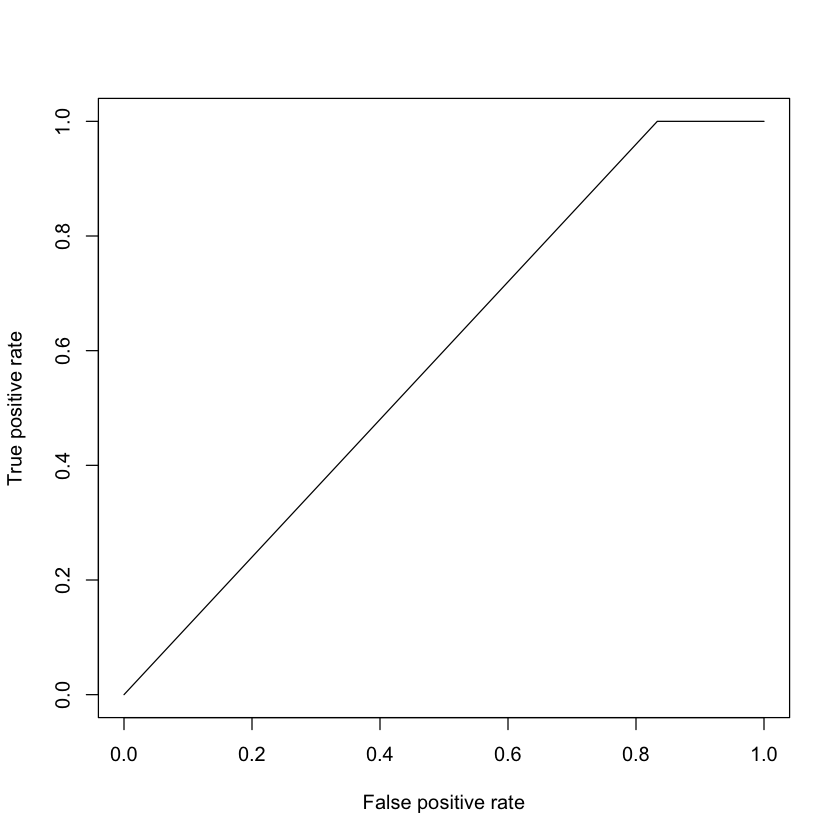

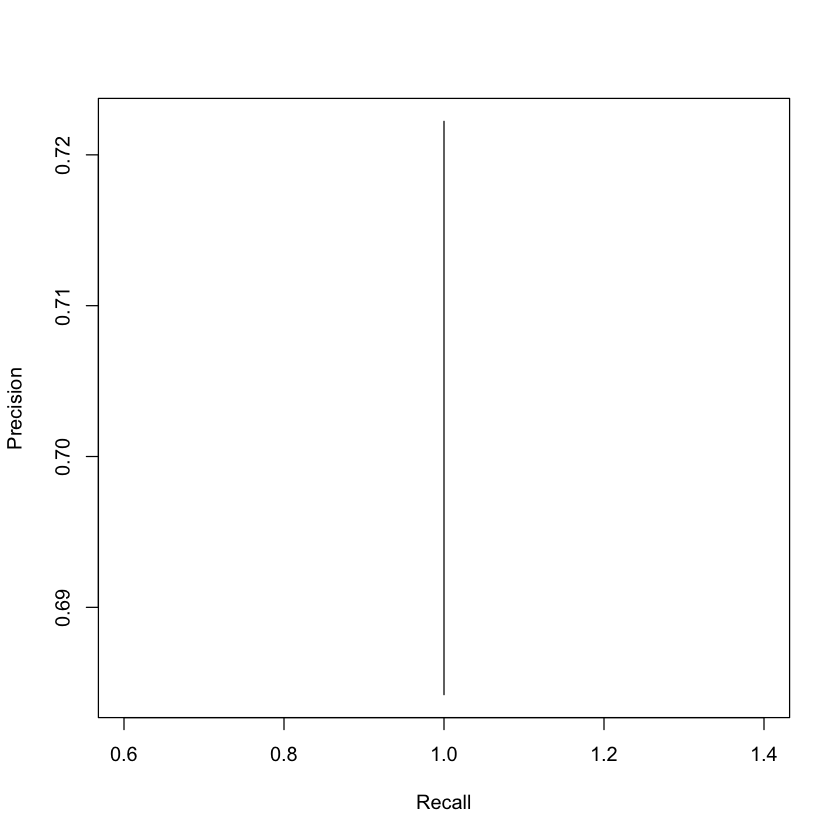

In [40]:
perf1 <- performance(ret.assessment,"tpr","fpr")
plot(perf1)

perf3 <- performance(ret.assessment, "prec", "rec")
plot(perf3)

In [32]:
model = svm(xTrain, yTrain)
svm_pred = predict(model, xTest)
ret.assessment <- prediction (svm_pred, yTest)

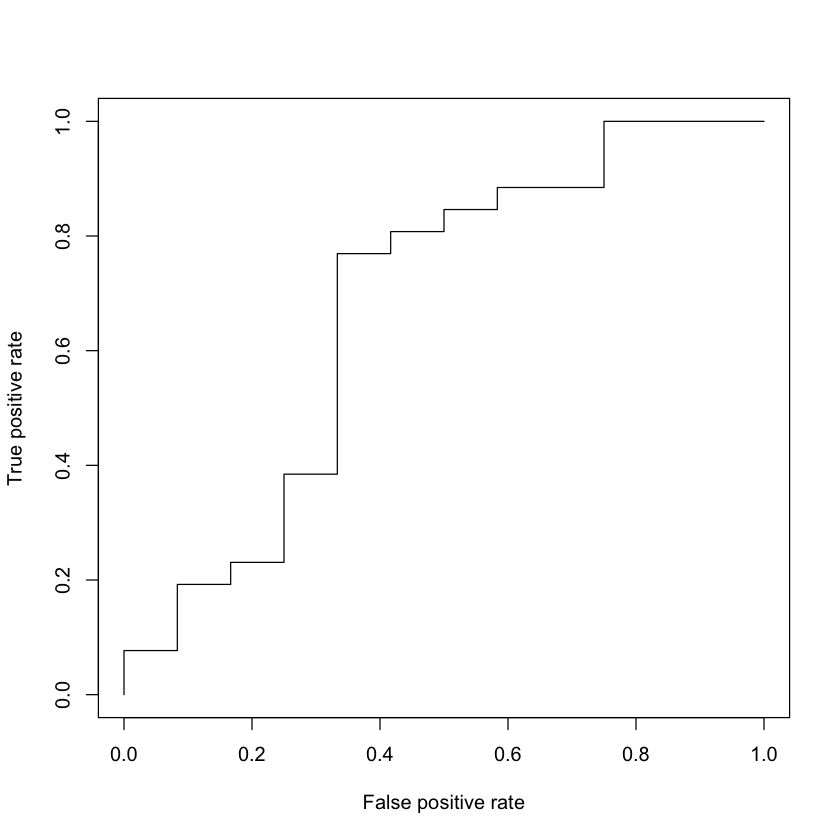

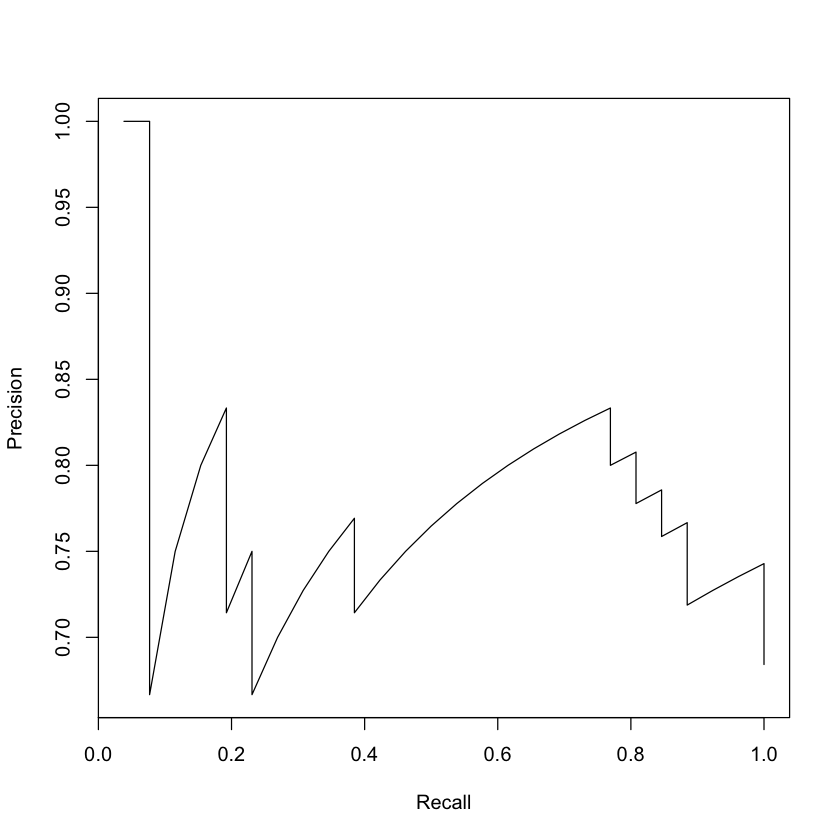

In [33]:
perf1 <- performance(ret.assessment,"tpr","fpr")
plot(perf1)

perf3 <- performance(ret.assessment, "prec", "rec")
plot(perf3)

In [45]:
model = glm(yTrain~., data=x, family=binomial)
glm_pred = predict(model, xTest, type="response")
ret.assessment <- prediction (glm_pred, yTest)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

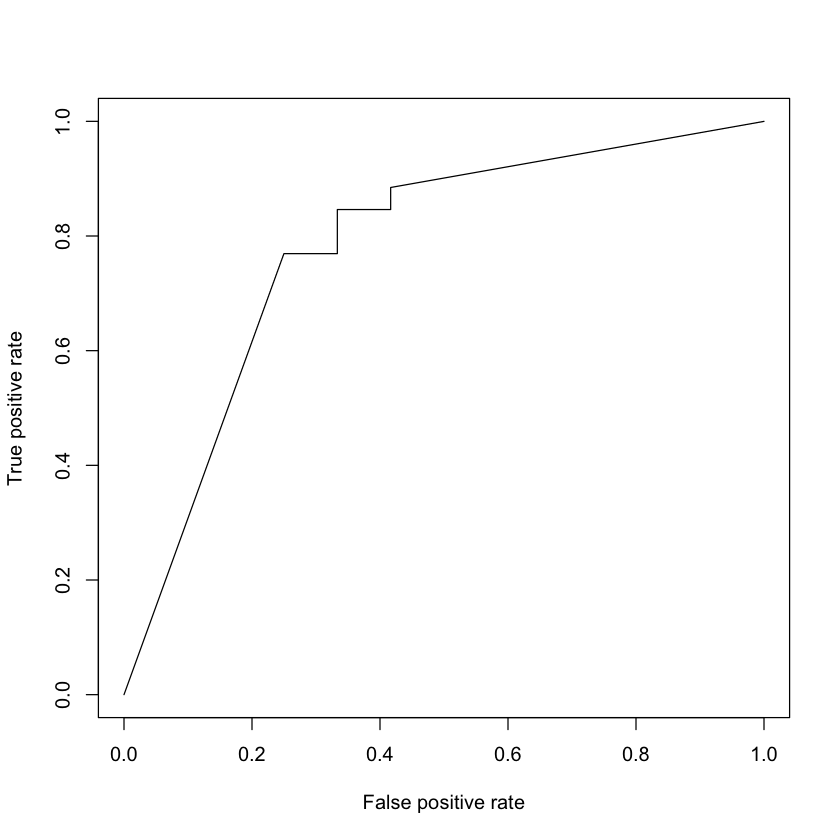

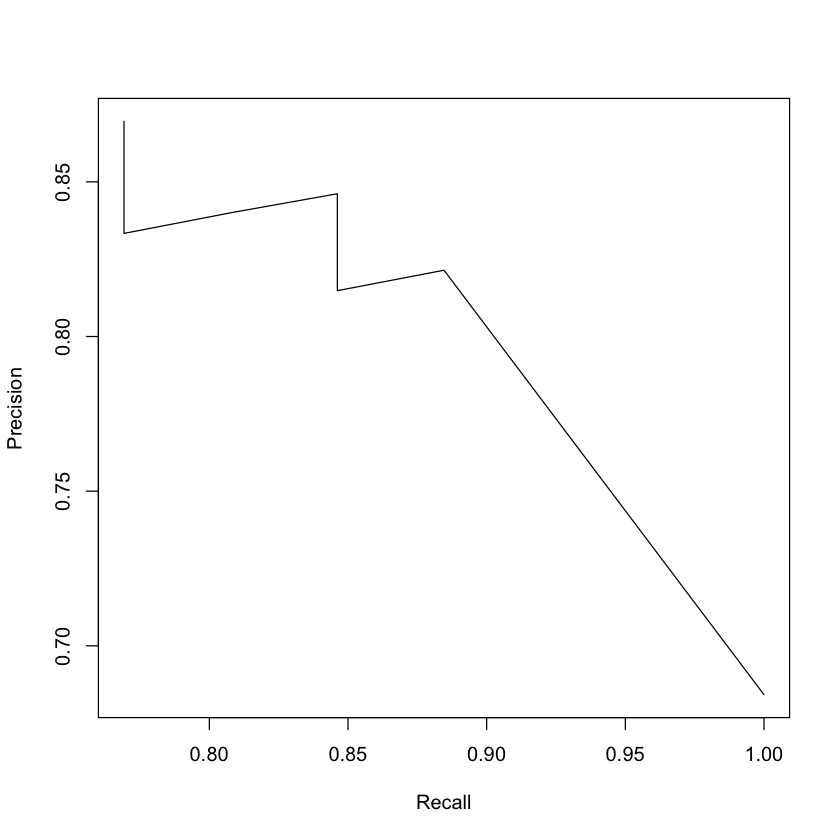

In [46]:
perf1 <- performance(ret.assessment,"tpr","fpr")
plot(perf1)

perf3 <- performance(ret.assessment, "prec", "rec")
plot(perf3)

In [48]:
biocLite(c("randomForest"))
library (randomForest)

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.3 (2017-03-06).
Installing package(s) ‘randomForest’



  There is a binary version available but the source version is later:
             binary source needs_compilation
randomForest 4.6-12 4.6-14              TRUE



installing the source package ‘randomForest’

Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘randomForest’ had non-zero exit status”Old packages: 'bit', 'caret', 'cluster', 'curl', 'CVST', 'data.table',
  'ddalpha', 'digest', 'dplyr', 'ff', 'foreign', 'haven', 'hexbin', 'httpuv',
  'kernlab', 'later', 'leaflet', 'lme4', 'lubridate', 'MASS', 'Matrix', 'mgcv',
  'ndjson', 'openssl', 'openxlsx', 'pillar', 'pROC', 'prodlim', 'purrr',
  'quantreg', 'randomForest', 'ranger', 'RcppEigen', 'readxl', 'rgl', 'rJava',
  'rjson', 'robustbase', 'rpart', 'rrcov', 'sourcetools', 'sp', 'streamR',
  'survival', 'tidyr', 'tidyselect', 'utf8', 'xgboost', 'xts', 'yaml'
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [51]:
model <- randomForest(yTrain~.,data = x,ntree=600)
rf_pred = predict(model, xTest)
ret.assessment <- prediction (rf_pred, yTest)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

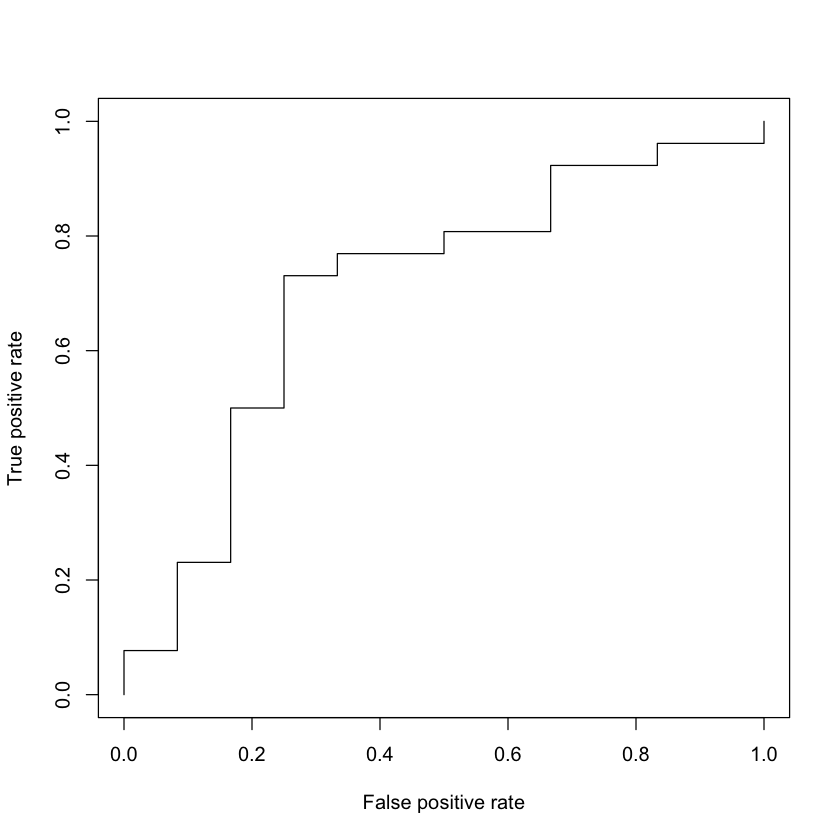

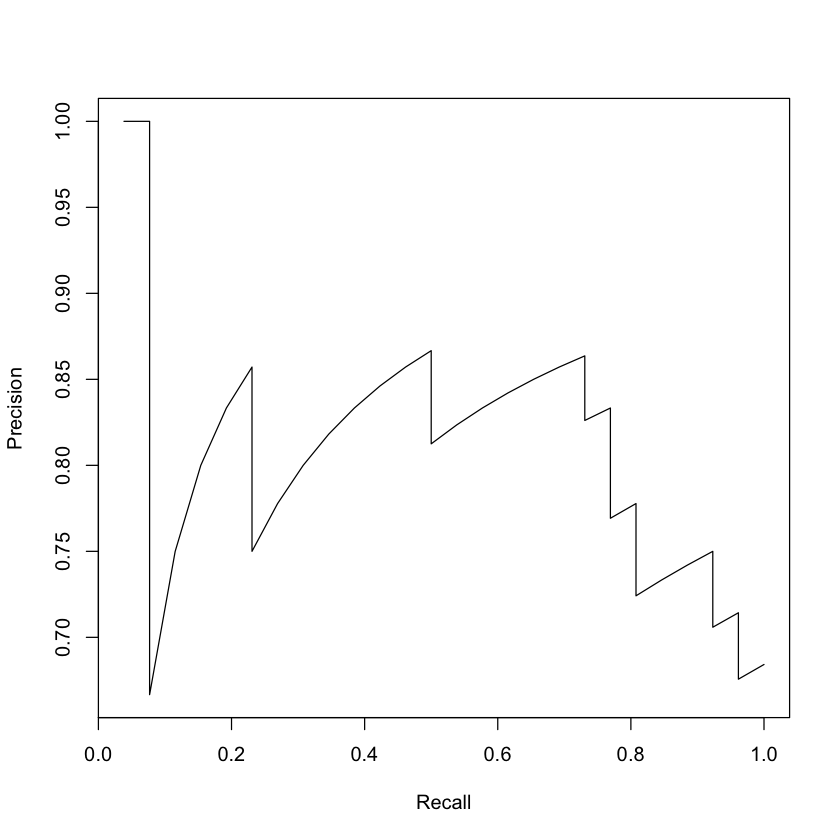

In [52]:
perf1 <- performance(ret.assessment,"tpr","fpr")
plot(perf1)

perf3 <- performance(ret.assessment, "prec", "rec")
plot(perf3)

In [53]:
library(ipred)

In [54]:
model <- bagging(yTrain~.,data = x)
bc_pred = predict(model, xTest, type='class')
ret.assessment <- prediction (bc_pred, yTest)

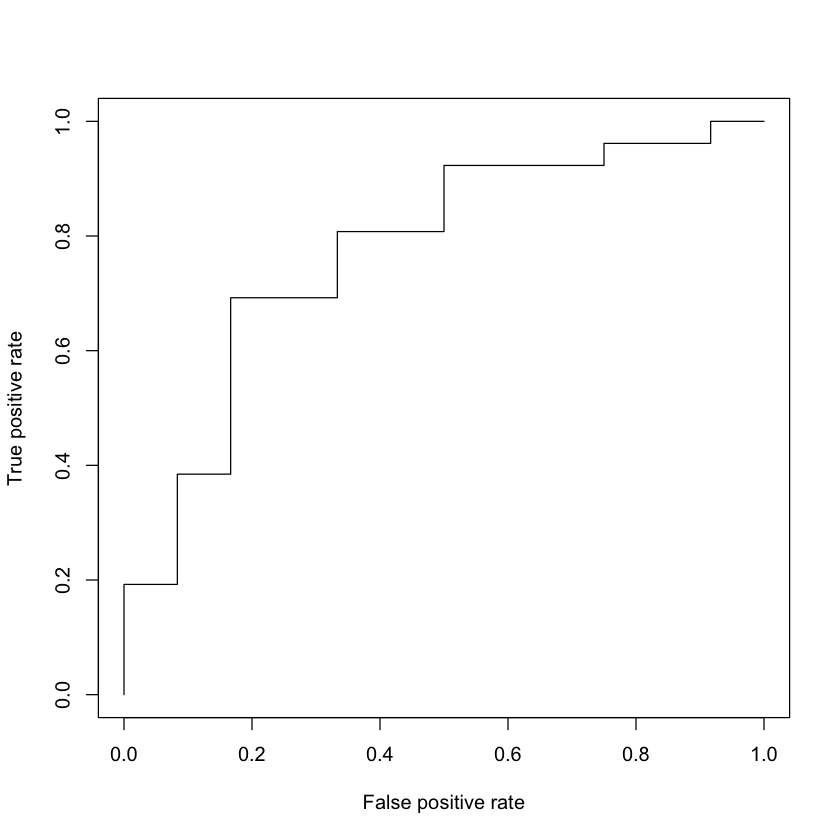

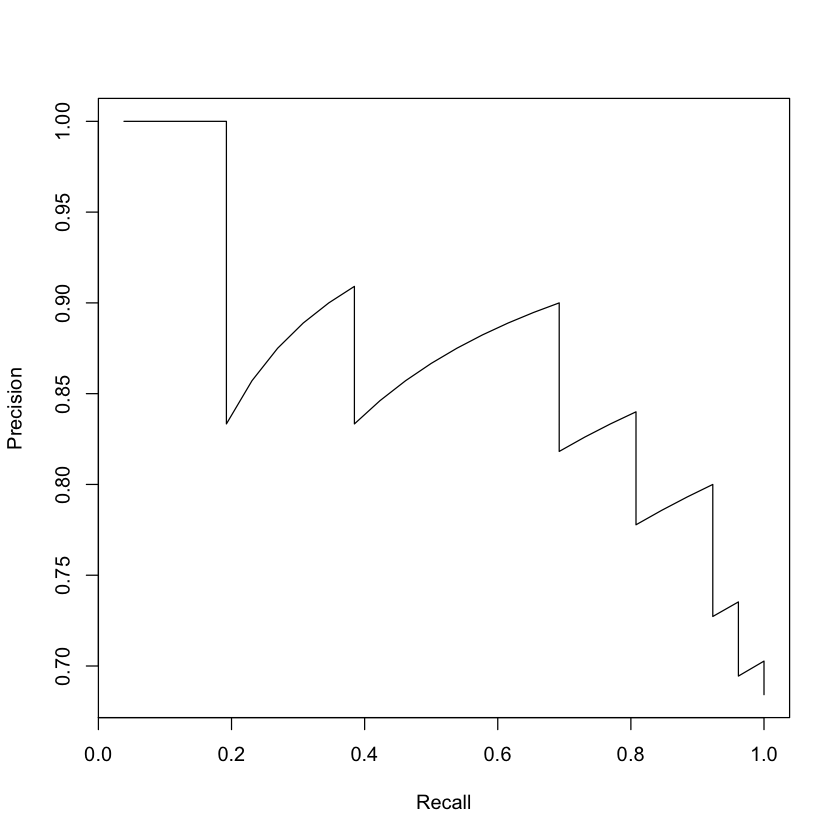

In [55]:
perf1 <- performance(ret.assessment,"tpr","fpr")
plot(perf1)

perf3 <- performance(ret.assessment, "prec", "rec")
plot(perf3)